In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Load dataset
dataset = pd.read_csv('Mall_Customers.csv')
# Display dataset
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#Select features
X = dataset.iloc[:, 3:5].values
# Display X
X
# Spectral Clustering
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=5, random_state=42, affinity='nearest_neighbors')
y_clustering = clustering.fit_predict(X)

/Users/harikrishnan/Documents/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [4]:
# Display cluster labels
y_clustering
# Add cluster labels to dataset
supervised = dataset
supervised['Cluster_group'] = y_clustering
# Display supervised dataset
supervised
# Save to CSV
supervised.to_csv("cluster_spectral.csv", index=False)
# Get attributes
dir(clustering)
# Get cluster labels again
y_clustering
# Get column names
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

/Users/harikrishnan/Documents/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


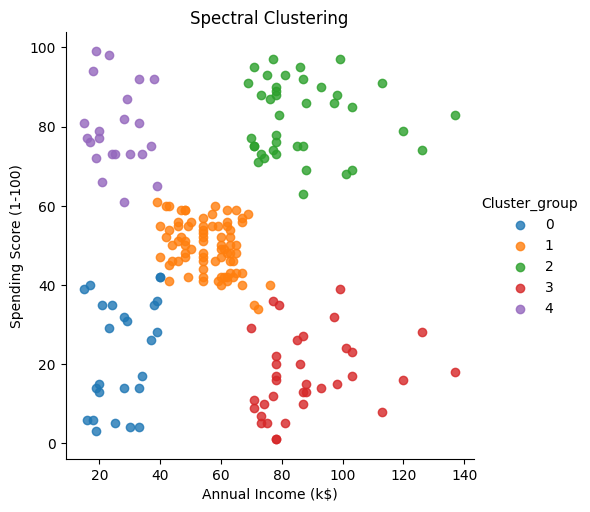


Number of clusters: 5

Note: Spectral Clustering does not provide cluster centers directly.


In [5]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], 
                   hue=supervised.columns[5], fit_reg=False, legend=True, legend_out=True)

plt.title('Spectral Clustering')
plt.show()

# Print number of clusters
n_clusters = clustering.n_clusters
print(f"\nNumber of clusters: {n_clusters}")

# Note: Spectral Clustering doesn't have cluster_centers_ attribute
print("\nNote: Spectral Clustering does not provide cluster centers directly.")